# Merge Sort, Quicksort and Divide-n-Conquer Algorithms in Python

## Problem Statement

> **QUESTION 1**: You're working on a new feature on Jovian called "Top Notebooks of the Week". Write a function to sort a list of notebooks in decreasing order of likes. Keep in mind that up to millions of notebooks can be created every week, so your function needs to be as efficient as possible.

The problem of sorting a list of objects comes up over and over in computer science and software development, and it's important to understand common approaches for sorting, and the trade-offs they offer. Before we solve the above problem, we'll solve a simplified version of the problem:

> **QUESTION 2**: Write a program to sort a list of numbers.

"Sorting" usually refers to "sorting in ascending order", unless specified otherwise.

In [1]:
# jovian library import
!pip install jovian --upgrade --quiet
from jovian.pythondsa import evaluate_test_cases

<IPython.core.display.Javascript object>

### Test Case Scenarios

Here are some scenarios we may want to test out:

- Some lists of numbers in random order.
- A list that's already sorted.
- A list that's sorted in descending order.
- A list containing repeating elements.
- An empty list.
- A list containing just one element.
- A list containing one element repeated many times.
- A really long list.

In [2]:
# List of numbers in random order
test0 = {
    'input': {
        'nums': [4, 2, 6, 3, 4, 6, 2, 1]
    },
    'output': [1, 2, 2, 3, 4, 4, 6, 6]
}

In [3]:
# List of numbers in random order
test1 = {
    'input': {
        'nums': [5, 2, 6, 1, 23, 7, -12, 12, -243, 0]
    },
    'output': [-243, -12, 0, 1, 2, 5, 6, 7, 12, 23]
}

In [4]:
# A list that's already sorted
test2 = {
    'input': {
        'nums': [3, 5, 6, 8, 9, 10, 99]
    },
    'output': [3, 5, 6, 8, 9, 10, 99]
}

In [5]:
# A list that's sorted in descending order
test3 = {
    'input': {
        'nums': [99, 10, 9, 8, 6, 5, 3]
    },
    'output': [3, 5, 6, 8, 9, 10, 99]
}

In [6]:
# A list containing repeating elements
test4 = {
    'input': {
        'nums': [5, -12, 2, 6, 1, 23, 7, 7, -12, 6, 12, 1, -243, 1, 0]
    },
    'output': [-243, -12, -12, 0, 1, 1, 1, 2, 5, 6, 6, 7, 7, 12, 23]
}

In [7]:
# An empty list 
test5 = {
    'input': {
        'nums': []
    },
    'output': []
}

In [8]:
# A list containing just one element
test6 = {
    'input': {
        'nums': [23]
    },
    'output': [23]
}

In [9]:
# A list containing one element repeated many times
test7 = {
    'input': {
        'nums': [42, 42, 42, 42, 42, 42, 42]
    },
    'output': [42, 42, 42, 42, 42, 42, 42]
}

To create the final test case (a really long list), we can start with a sorted list created using `range` and shuffle it to create the input.

In [10]:
import random

in_list = list(range(10000))
out_list = list(range(10000))
random.shuffle(in_list)

test8 = {
    'input': {
        'nums': in_list
    },
    'output': out_list
}

In [11]:
tests = [test0, test1, test2, test3, test4, test5, test6, test7, test8]

### Bubble Sort


1. Iterate over the list of numbers, starting from the left
2. Compare each number with the number that follows it
3. If the number is greater than the one that follows it, swap the two elements
4. Repeat steps 1 to 3 till the list is sorted.

We need to repeat steps 1 to 3 at most n-1 times to ensure that the array is sorted. Can you explain why? Hint: After one iteration, the largest number in the list.

This method is called **bubble sort**, as it causes smaller elements to *bubble* to the top and larger to *sink* to the bottom. 

In [12]:
def bubble_sort(nums):
    # Create a copy of the list, to avoid changing it
    nums = list(nums)
    
    # 4. Repeat the process n-1 times
    for _ in range(len(nums) - 1):
        
        # 1. Iterate over the array (except last element)
        for i in range(len(nums) - 1):
            
            # 2. Compare the number with  
            if nums[i] > nums[i+1]:
                
                # 3. Swap the two elements
                nums[i], nums[i+1] = nums[i+1], nums[i]
    
    # Return the sorted list
    return nums

In [13]:
results = evaluate_test_cases(bubble_sort, tests)


TEST CASE #0

Input:
{'nums': [4, 2, 6, 3, 4, 6, 2, 1]}

Expected Output:
[1, 2, 2, 3, 4, 4, 6, 6]


Actual Output:
[1, 2, 2, 3, 4, 4, 6, 6]

Execution Time:
0.01 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'nums': [5, 2, 6, 1, 23, 7, -12, 12, -243, 0]}

Expected Output:
[-243, -12, 0, 1, 2, 5, 6, 7, 12, 23]


Actual Output:
[-243, -12, 0, 1, 2, 5, 6, 7, 12, 23]

Execution Time:
0.008 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'nums': [3, 5, 6, 8, 9, 10, 99]}

Expected Output:
[3, 5, 6, 8, 9, 10, 99]


Actual Output:
[3, 5, 6, 8, 9, 10, 99]

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'nums': [99, 10, 9, 8, 6, 5, 3]}

Expected Output:
[3, 5, 6, 8, 9, 10, 99]


Actual Output:
[3, 5, 6, 8, 9, 10, 99]

Execution Time:
0.047 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'nums': [5, -12, 2, 6, 1, 23, 7, 7, -12, 6, 12, 1, -243, 1, 0]}

Expected Output:
[-243, -12, -12, 0, 1, 1, 1, 2, 5, 6, 6, 7, 7, 12, 23]


Actual Output:
[-243, -12, -12, 0, 1, 1, 1, 2,

#### Big O Notation

Time Complexity is $O(n^2)$ (also known as quadratic complexity). There are two loops, each of length `n-1`, where `n` is the number of elements in `nums`. So the total number of comparisons is $(n−1)∗(n−1)$  i.e. $(n−1)^2$  i.e. $n^2−2n+1$.

Space complexity of bubble sort is $O(n)$, even though it requires only constant/zero additional space, because the space required to store the inputs is also considered while calculating space complexity.

### Insertion Sort

 Another simple sorting technique is called insertion sort, where we keep the initial portion of the array sorted and insert the remaining elements one by one at the right position.

Example: Move cards around in your hand.

In [14]:
def insertion_sort(nums):
    nums = list(nums)
    for i in range(len(nums)):
        cur = nums.pop(i)
        j = i-1
        while j >=0 and nums[j] > cur:
            j -= 1
        nums.insert(j+1, cur)
    return nums 

In [15]:
nums0, output0 = test0['input']['nums'], test0['output']

print('Input:', nums0)
print('Expected output:', output0)
result0 = insertion_sort(nums0)
print('Actual output:', result0)
print('Match:', result0 == output0)

Input: [4, 2, 6, 3, 4, 6, 2, 1]
Expected output: [1, 2, 2, 3, 4, 4, 6, 6]
Actual output: [1, 2, 2, 3, 4, 4, 6, 6]
Match: True


#### 🧠 Real-World Behavior

- Insertion Sort is generally faster than Bubble Sort on small or nearly sorted datasets.

- Both are inefficient for large lists ($O(n²)$), but:

    - Insertion Sort is better in practice.

    - Bubble Sort is mostly used for teaching, not production.

### Divide & Conquer

General steps to be followed:

- Divide the inputs into two roughly equal parts.
- Recursively solve the problem individually for each of the two parts.
- Combine the results to solve the problem for the original inputs.
- Include terminating conditions for small or indivisible inputs.

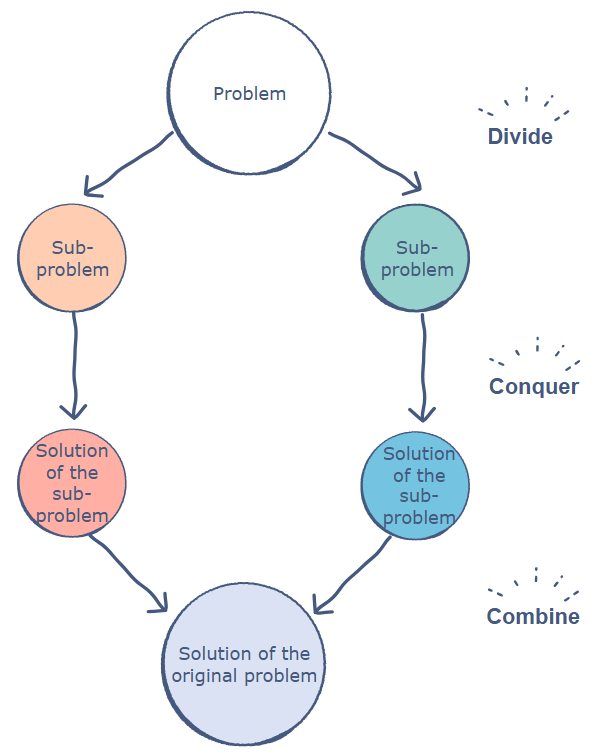

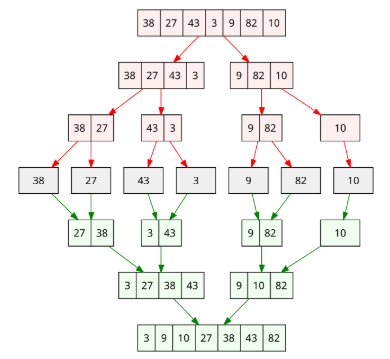